In [1]:
# Import Libraries
# Standard Libraries
import os
import sys

# os: Provides a way to use operating system-dependent functionality like reading or writing to the file system.
# sys: Provides access to some variables used or maintained by the interpreter and to functions that interact with the interpreter.

# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# numpy (np): A library for numerical operations in Python, particularly for array and matrix operations.
# pandas (pd): A library for data manipulation and analysis, providing data structures like DataFrames to handle tabular data efficiently.

# File Path Handling
from pathlib import Path

# pathlib.Path: A module for filesystem path manipulation, providing a unified way to handle file and directory paths.

# Statistical and Time Series Analysis Libraries
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# statsmodels.api (sm): A library for statistical models and hypothesis tests.
# VAR: Vector Autoregressive models for multivariate time series analysis.
# adfuller: Augmented Dickey-Fuller test to check for stationarity in time series data.

# Auto ARIMA for Time Series Forecasting
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima
import pmdarima as pm

# train_test_split: Function to split data into training and testing sets.
# auto_arima: Automated ARIMA model fitting to find the best parameters for ARIMA models.
# pmdarima (pm): A library for time series forecasting using ARIMA models.

# Additional Time Series Models and Plotting Functions
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA: AutoRegressive Integrated Moving Average model for time series forecasting.
# SARIMAX: Seasonal AutoRegressive Integrated Moving-Average with eXogenous factors model.
# plot_acf, plot_pacf: Functions to plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) respectively.

# Deep Learning Libraries
import tensorflow as tf

# tensorflow (tf): An open-source platform for machine learning, widely used for building and training deep learning models.

# Plotting Libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# matplotlib.pyplot (plt): A plotting library for creating static, animated, and interactive visualizations in Python.
# plotly.graph_objects (go): A high-level library for creating interactive plots and dashboards.
# seaborn: a visual library based on matplotlib that provides high level interface for informative statistical graphics

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler: A feature scaling technique provided by scikit-learn to normalize data within a given range, often between 0 and 1.

# Forecasting Library
from prophet import Prophet

# Prophet: A forecasting tool developed by Facebook, designed to handle time series data and make forecasts with minimal tuning.

# Hyperparameter Tuning for Keras Models
import keras_tuner as kt
from kerastuner import HyperModel, HyperParameters, RandomSearch
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# keras_tuner (kt): A library for hyperparameter tuning for Keras models.
# Conv1D, MaxPooling1D: Layers used for building Convolutional Neural Networks (CNNs) for sequential data.
# LSTM: Long Short-Term Memory layer for building Recurrent Neural Networks (RNNs) for sequence prediction.
# Sequential: A Keras model type that allows you to build models layer by layer.
# Dense, Flatten: Commonly used layers in neural networks; Dense is a fully connected layer, and Flatten reshapes the input data.


C:\conda_tmp\ipykernel_22096\3843077514.py:75: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, HyperParameters, RandomSearch


In [2]:
# File paths for data
path = Path(r"C:\Users\Frederick Duff\Desktop\Real Estate Project\statisticsday.csv")
# source- DABR- Matrix custom report- Active and Sales #'s'
# https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
path2 = Path(r"C:\Users\Frederick Duff\Desktop\Real Estate Project\historicalweeklydata.xlsx")
# freddie Mac  https://www.freddiemac.com/pmms
path3 = Path(r"C:\Users\Frederick Duff\Desktop\Real Estate Project\inflation.xlsx")
# https://www.usinflationcalculator.com/inflation/historical-inflation-rates/

In [3]:
# Read the data
df = pd.read_csv(path, parse_dates=['Month'])
df1 = pd.read_excel(path2)
df2 = pd.read_excel(path3)

In [4]:
df = df.rename(columns={
    '#_of_New_Listings': 'New_Listings',
    'Sales_Volume': 'Sales_Volume',
    'Expired_Listings': 'Expired_Listings',
    'Active Listings, Number of': 'Active',
    'Sales, Number of':'Sales',
    '#_of_New_Listings':'New_Listings',
    'Consumer Price Index':'CPI'
})

In [5]:
# Clean the first dataset
df = df.rename(columns={'Active Listings, Number of':'Active', 'Sales, Number of':'Sales', 'Consumer Price Index':'CPI','#_of_New_Listings': 'New_Listings','Sales_Volume': 'Sales_Volume','Expired_Listings': 'Expired_Listings'})
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df['Active'] = df['Active'].str.replace(',', '').astype(float)
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)
df['New_Listings'] = df['New_Listings'].astype(str).str.replace(',', '').astype(float)
# Clean the 'Sales_Volume' column by removing dollar signs, commas, and trimming spaces
df['Sales_Volume'] = df['Sales_Volume'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)
# Clean the 'Expired_Listings' column in a similar manner
df['Expired_Listings'] = df['Expired_Listings'].astype(str).str.replace(',', '').str.strip().astype(float)
df.set_index('Month', inplace=True)

C:\conda_tmp\ipykernel_22096\1822709433.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales_Volume'] = df['Sales_Volume'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [6]:
# Clean the second dataset
df1 = df1.rename(columns={'US 30 yr FRM':'30yrFRM', 'us 15yr FRM':'15yrFRM', 'Week':'Month'})
df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m')
df1.set_index('Month', inplace=True)
df1 = df1[['30yrFRM']].resample('MS').mean()  # Monthly average

In [7]:
# Clean the third dataset
df2['Month'] = pd.to_datetime(df2['Month'], format='%Y-%m')
df2.set_index('Month', inplace=True)

In [8]:
# Combine all dataframes
data = df.join(df1, how='inner').join(df2, how='inner')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2010-01-01 to 2024-07-01
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active            175 non-null    float64
 1   Sales             175 non-null    float64
 2   CPI               175 non-null    float64
 3   New_Listings      175 non-null    float64
 4   Sales_Volume      175 non-null    float64
 5   Expired_Listings  175 non-null    float64
 6   30yrFRM           175 non-null    float64
 7   Inflation_Rate    175 non-null    float64
 8   Unemployment      175 non-null    float64
dtypes: float64(9)
memory usage: 17.7 KB
None


In [10]:
print(data.head())

             Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01   9771.0   649.0  216.687        1922.0    63910551.0   
2010-02-01   9992.0   711.0  216.741        1879.0    72016005.0   
2010-03-01  10592.0  1137.0  217.631        2797.0   124253682.0   
2010-04-01  10924.0  1289.0  218.009        2738.0   142969152.0   
2010-05-01  11154.0  1416.0  218.178        2073.0   167390513.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2010-01-01            1694.0   5.0520             2.1          12.8  
2010-02-01            1545.0   4.9900             2.3          12.3  
2010-03-01            1791.0   4.9675             2.2          12.0  
2010-04-01            1748.0   5.0980             2.0          11.2  
2010-05-01            1669.0   4.8875             1.1          10.7  


In [11]:
print(data.tail())

            Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                             
2024-03-01  5240.0  1538.0  312.332        1528.0   392973764.0   
2024-04-01  5482.0  1568.0  313.548        1752.0   372707814.0   
2024-05-01  5445.0  1698.0  314.069        1940.0   443462424.0   
2024-06-01  5689.0  1580.0  314.175        1787.0   415423494.0   
2024-07-01  5637.0  1592.0  314.803        1822.0   405238878.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2024-03-01            1778.0   6.8200             3.4           4.4  
2024-04-01            1602.0   6.9925             3.4           4.5  
2024-05-01            1437.0   7.0600             4.4           4.5  
2024-06-01            1413.0   6.9175             3.0           4.1  
2024-07-01            1451.0   6.8475             2.9           4.3  


In [12]:
data.shape

(175, 9)

In [13]:
data.describe(include='all')

,Active,Sales,CPI,New_Listings,Sales_Volume,Expired_Listings,30yrFRM,Inflation_Rate,Unemployment
count,175.000000,175.000000,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000
mean,8152.017143,1385.840000,252.386497,1769.531429,2.178135e+08,1782.457143,4.327977,2.592571,6.009143
std,2661.387231,326.546748,26.883415,416.202589,1.005317e+08,430.302189,1.116591,1.998074,2.438184
min,3934.000000,649.000000,216.687000,856.000000,5.965514e+07,1135.000000,2.684000,-0.200000,3.100000
25%,5679.500000,1128.500000,233.525000,1462.000000,1.335200e+08,1494.000000,3.620000,1.400000,4.250000
50%,8230.000000,1410.000000,244.524000,1798.000000,2.002838e+08,1638.000000,4.046000,2.000000,4.900000
75%,10205.000000,1637.000000,260.431000,2093.000000,2.884747e+08,1969.000000,4.606750,3.200000,7.600000
max,14068.000000,2021.000000,314.803000,2797.000000,4.450543e+08,3021.000000,7.620000,9.100000,15.100000


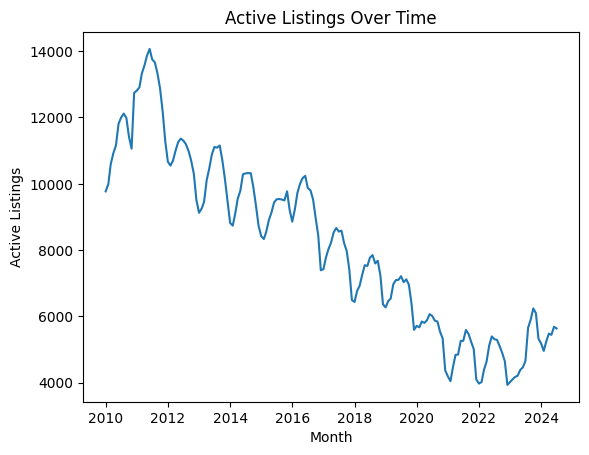

In [14]:
# Creating a line plot
sns.lineplot(data=data, x=data.index, y='Active')
plt.xlabel('Month')
plt.ylabel('Active Listings')
plt.title('Active Listings Over Time')
plt.show()

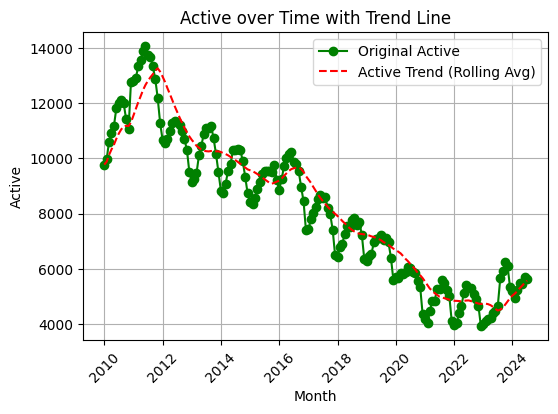

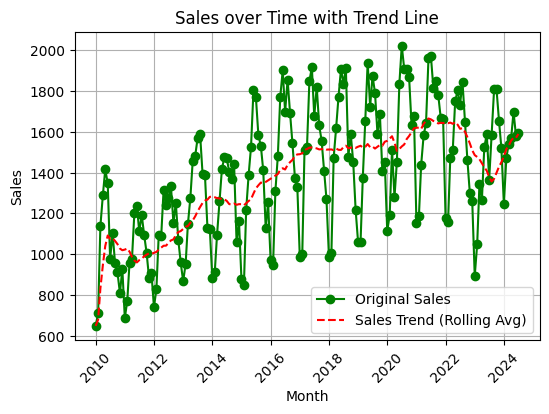

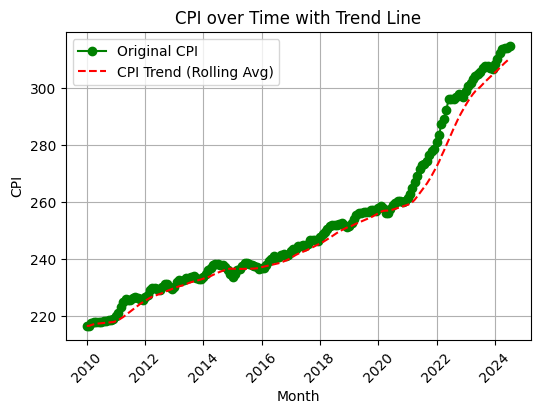

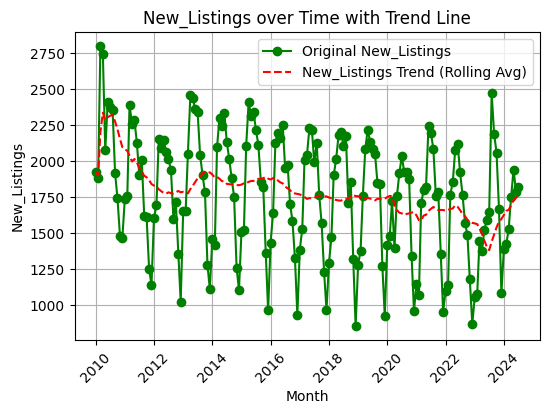

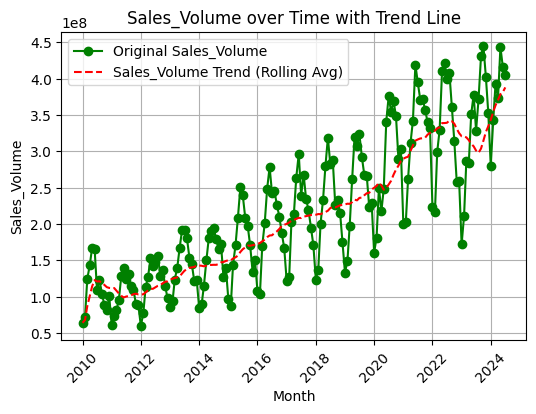

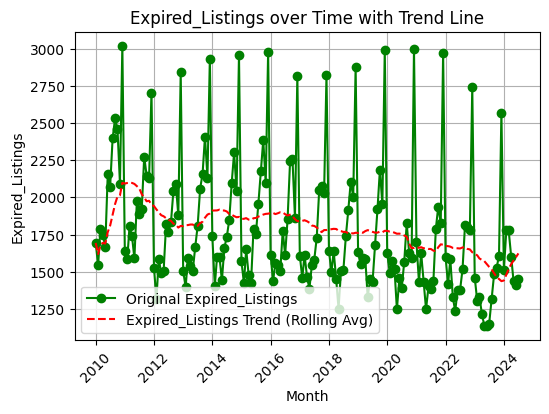

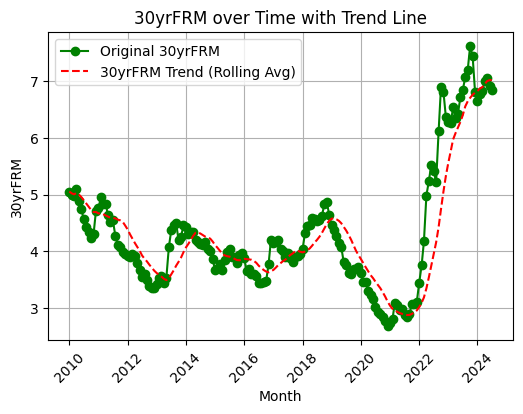

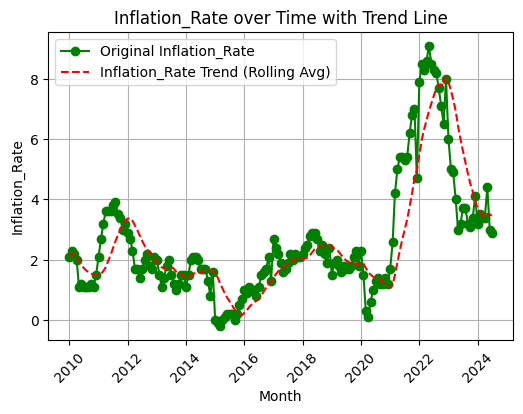

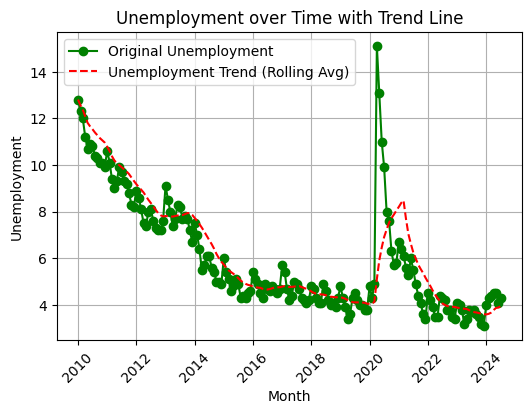

In [15]:
# Calculate rolling average with a window of 12
rolling_window = 12
data_rolling = data.rolling(window=rolling_window, min_periods=1).mean()

# Plot each column in a separate graph with a trend line
for column in data.columns:
    plt.figure(figsize=(6, 4))
    plt.plot(data.index, data[column], label=f'Original {column}', marker='o',color='green')
    plt.plot(data_rolling.index, data_rolling[column], label=f'{column} Trend (Rolling Avg)', linestyle='--',color='red')
    plt.title(f'{column} over Time with Trend Line')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



In [16]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    interpretation = "The time series is stationary." if result[0] < result[4]['5%'] else "The time series is non-stationary."
    return {'Test Statistic': result[0], 'p-value': result[1], 'Lags Used': result[2], 'Number of Observations': result[3], 'Critical Values': result[4], 'Interpretation': interpretation}

sales_stationarity = adf_test(data['Sales'])
print(sales_stationarity)


{'Test Statistic': -1.8923741071065223, 'p-value': 0.335657031901705, 'Lags Used': 14, 'Number of Observations': 160, 'Critical Values': {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 'Interpretation': 'The time series is non-stationary.'}


In [17]:
# Fit VAR model
model = VAR(data)
results = model.fit(maxlags=2)
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Aug, 2024
Time:                     22:41:48
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    72.1144
Nobs:                     173.000    HQIC:                   70.2620
Log likelihood:          -8006.57    FPE:                9.30504e+29
AIC:                      68.9975    Det(Omega_mle):     3.64269e+29
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                    3856.132525      1466.785868            2.629           0.009
L1.Active                   0.937867         0.103250            9.083           0.000
L1.Sales                   -0.70542

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


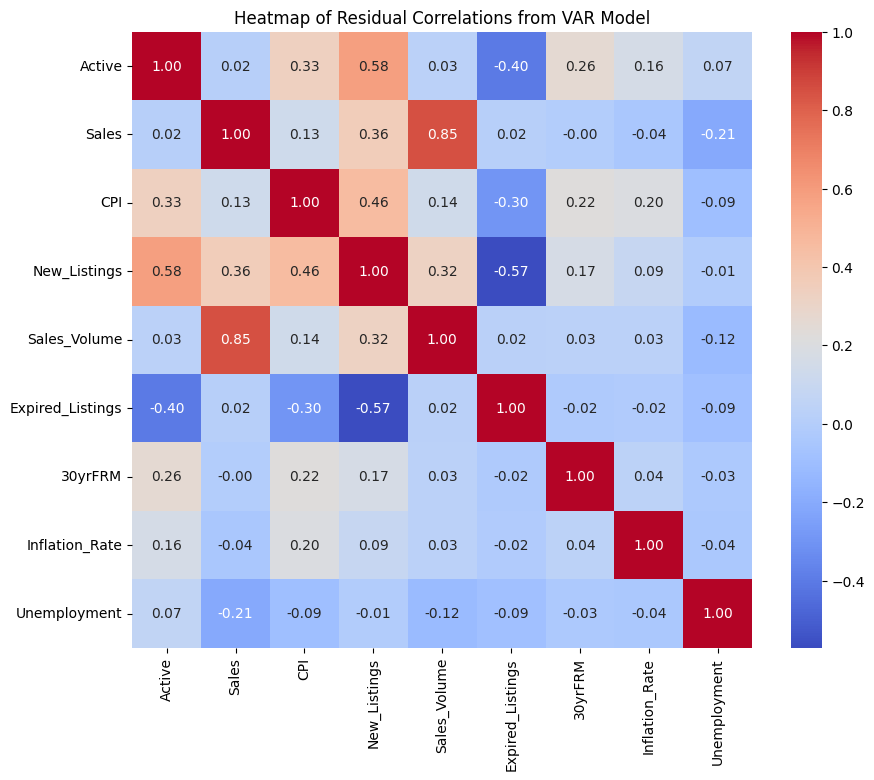

In [18]:
# Extract the residuals correlation matrix from the fitted VAR model
correlation_matrix = results.resid.corr()  # Use the results object, not model

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Residual Correlations from VAR Model")
plt.show()

In [19]:
# Remove the specified columns from the dataset
data = data.drop(columns=['Expired_Listings', 'Sales_Volume','New_Listings'])


In [20]:
# Re-run ADF test on 'Sales' after removing columns
sales_stationarity = adf_test(data['Sales'])
print(sales_stationarity)


{'Test Statistic': -1.8923741071065223, 'p-value': 0.335657031901705, 'Lags Used': 14, 'Number of Observations': 160, 'Critical Values': {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}, 'Interpretation': 'The time series is non-stationary.'}


In [21]:
# Fit VAR model on the reduced dataset
model_reduced = VAR(data)
results_reduced = model_reduced.fit(maxlags=2)
print(results_reduced.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Aug, 2024
Time:                     22:41:48
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    17.1787
Nobs:                     173.000    HQIC:                   16.3338
Log likelihood:          -2757.84    FPE:                6.98087e+06
AIC:                      15.7570    Det(Omega_mle):     4.51969e+06
--------------------------------------------------------------------
Results for equation Active
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  2728.987433       869.901633            3.137           0.002
L1.Active                 1.238224         0.079305           15.613           0.000
L1.Sales                  0.152447         

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


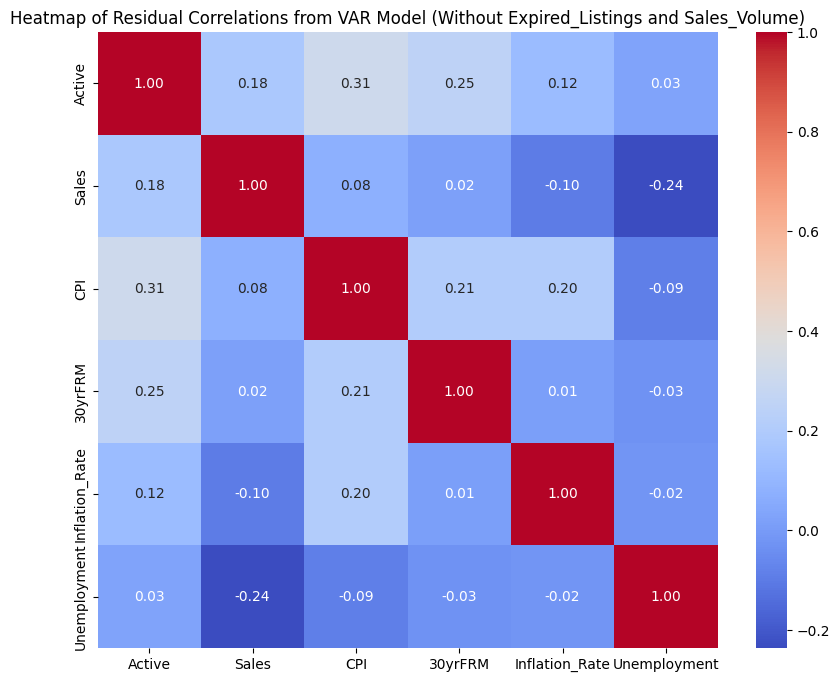

In [22]:
# Extract the residuals correlation matrix from the fitted VAR model
correlation_matrix_reduced = results_reduced.resid.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Residual Correlations from VAR Model (Without Expired_Listings and Sales_Volume)")
plt.show()


#### interpretation of VAR model: 
- lower AIC (Akaike Information Criterion) indicates a better model fit 15.755 reflects the model is fitting fairly well
- BIC ( Bayesian Information Criterion )- lower value indicates a better model , similar to AIC. 17.1767 would suggest that the model is generalizing reasonably well. 

 

                 Active        Sales         CPI   30yrFRM  Inflation_Rate  \
2024-08-01  5533.201992  1572.421953  315.314265  6.815687        2.883724   
2024-09-01  5380.830227  1547.761332  315.830222  6.796934        2.893252   
2024-10-01  5220.238505  1521.534070  316.401362  6.785484        2.911990   
2024-11-01  5074.565505  1506.229996  317.038124  6.780370        2.936707   
2024-12-01  4953.457970  1503.683346  317.736612  6.780581        2.963341   
2025-01-01  4855.932383  1511.601846  318.479897  6.784758        2.991228   
2025-02-01  4774.920445  1525.659397  319.248698  6.791381        3.019901   
2025-03-01  4701.796876  1541.518690  320.027094  6.799197        3.049174   
2025-04-01  4629.387000  1556.044910  320.805378  6.807439        3.078953   
2025-05-01  4553.353351  1567.678677  321.580135  6.815838        3.109176   
2025-06-01  4472.245723  1576.231364  322.352611  6.824490        3.139782   
2025-07-01  4386.744756  1582.389963  323.126486  6.833680      

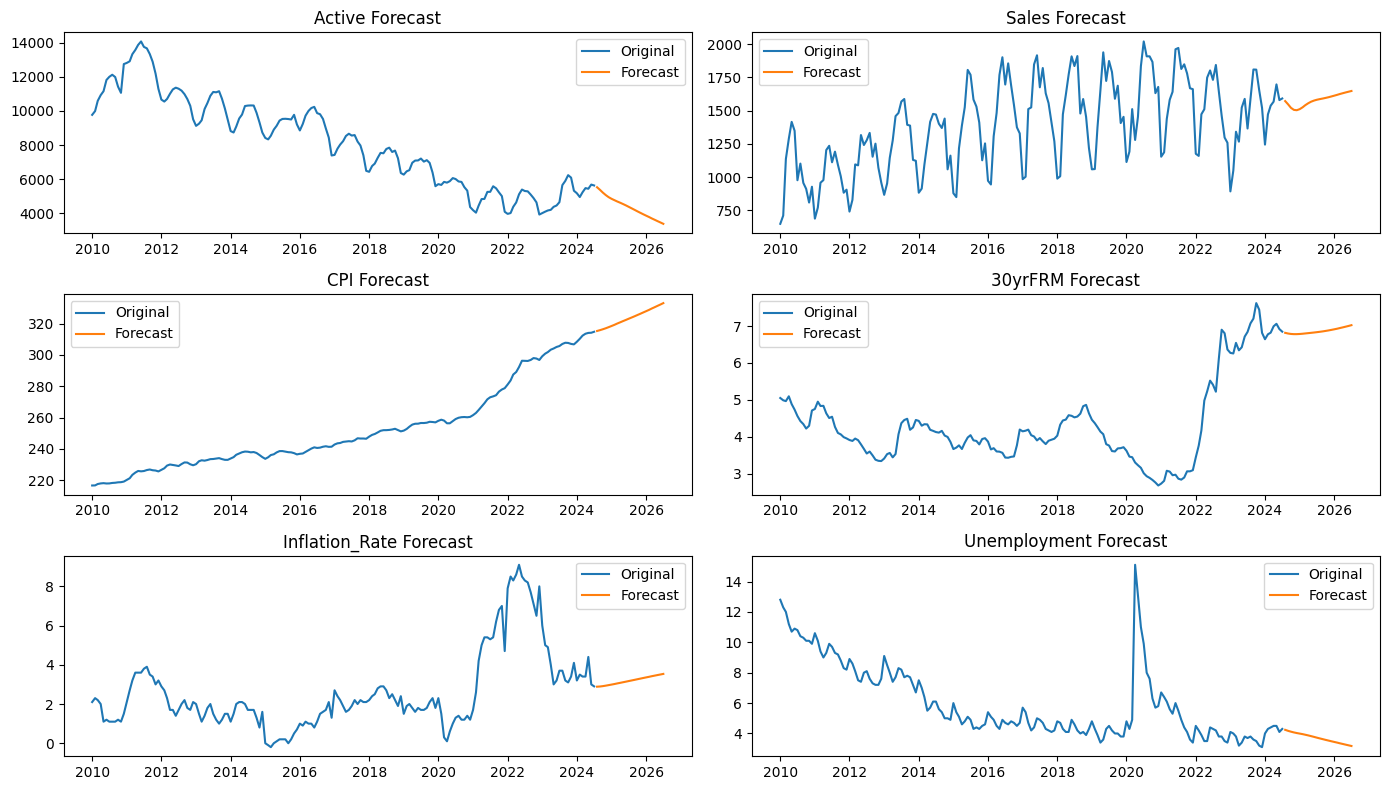

In [23]:
# Forecasting example with the reduced model
steps = 24
# Use the correct model and data
forecast = results_reduced.forecast(data.values[-results_reduced.k_ar:], steps=steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=steps, freq='MS')
forecastVAR_data = pd.DataFrame(forecast, index=forecast_index, columns=data.columns)
print(forecastVAR_data)

# Plotting the forecast
plt.figure(figsize=(14, 8))
for i, column in enumerate(forecastVAR_data.columns):
    plt.subplot(3, 2, i+1)
    plt.plot(data.index, data[column], label='Original')
    plt.plot(forecastVAR_data.index, forecastVAR_data[column], label='Forecast')
    plt.title(f'{column} Forecast')
    plt.legend()
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2328.041, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2205.467, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2251.993, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2326.179, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2329.139, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2203.782, Time=0.60 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2197.806, Time=0.48 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2251.957, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2238.296, Time=0.42 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2203.075, Time=0.30 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : 

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                   Sales   No. Observations:                  175
Model:             SARIMAX(4, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1065.089
Date:                                 Wed, 14 Aug 2024   AIC                           2156.178
Time:                                         22:42:29   BIC                           2197.246
Sample:                                     01-01-2010   HQIC                          2172.838
                                          - 07-01-2024                                         
Covariance Type:                                   opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Active             0.0742      0.031      2.422      0.015       0

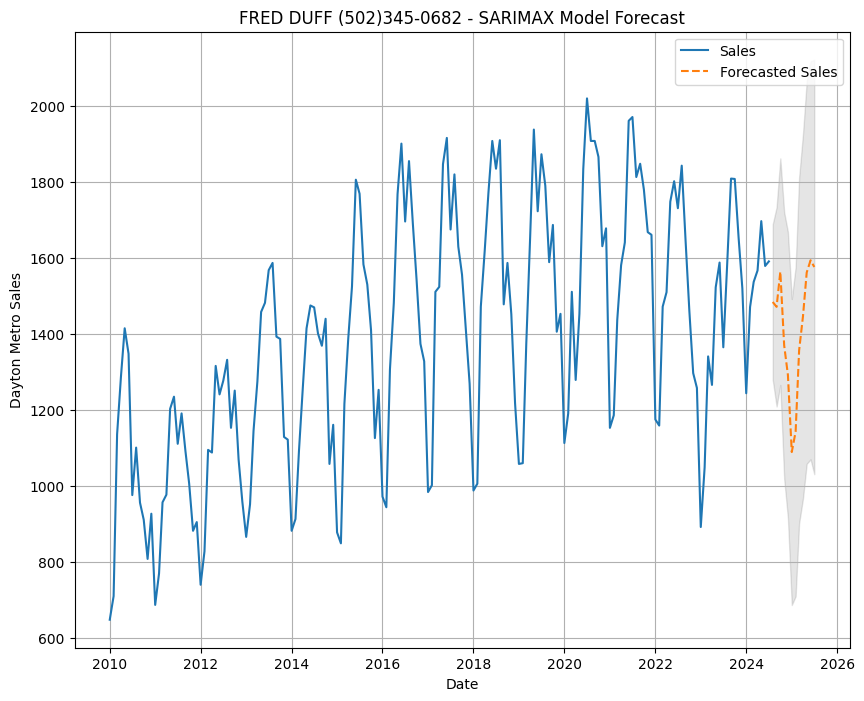

In [24]:
# Define the endogenous and exogenous variables
endog = data['Sales']
exog = data[['Active', 'CPI', '30yrFRM', 'Inflation_Rate', 'Unemployment']]

# Use auto_arima to find the best SARIMAX parameters
auto_arima_model = pm.auto_arima(endog, exogenous=exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

# Fit SARIMAX model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

# Forecast future values
forecast_steps = 12
exog_forecast = exog[-forecast_steps:]
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_SARIMA_data = forecast.summary_frame()
forecast_SARIMA_data.index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Print forecasted values
print("Forecasted Values:\n", forecast_SARIMA_data)

# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Sales'], label='Sales')
plt.plot(forecast_SARIMA_data.index, forecast_SARIMA_data['mean'], label='Forecasted Sales', linestyle='--')
plt.fill_between(forecast_SARIMA_data.index, forecast_SARIMA_data['mean_ci_lower'], forecast_SARIMA_data['mean_ci_upper'], color='k', alpha=0.10)
plt.title('FRED DUFF (502)345-0682 - SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
data['Sales']

Month
2010-01-01     649.0
2010-02-01     711.0
2010-03-01    1137.0
2010-04-01    1289.0
2010-05-01    1416.0
               ...  
2024-03-01    1538.0
2024-04-01    1568.0
2024-05-01    1698.0
2024-06-01    1580.0
2024-07-01    1592.0
Name: Sales, Length: 175, dtype: float64

In [26]:
data['Sales'].tail(12)

Month
2023-08-01    1584.0
2023-09-01    1810.0
2023-10-01    1809.0
2023-11-01    1654.0
2023-12-01    1521.0
2024-01-01    1245.0
2024-02-01    1472.0
2024-03-01    1538.0
2024-04-01    1568.0
2024-05-01    1698.0
2024-06-01    1580.0
2024-07-01    1592.0
Name: Sales, dtype: float64

In [27]:
forecast_SARIMA_data['mean']

2024-08-01    1485.206921
2024-09-01    1472.377919
2024-10-01    1564.962632
2024-11-01    1370.875439
2024-12-01    1293.211402
2025-01-01    1090.306300
2025-02-01    1143.916080
2025-03-01    1357.770758
2025-04-01    1447.490428
2025-05-01    1562.766774
2025-06-01    1594.994365
2025-07-01    1577.348196
Freq: MS, Name: mean, dtype: float64

In [28]:
datacopy = data.copy()

In [29]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using the ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

adf_test(datacopy['Sales'])


ADF Statistic: -1.8923741071065223
p-value: 0.335657031901705
Critical Value 1%: -3.4718957209472654
Critical Value 5%: -2.8797795410156253
Critical Value 10%: -2.5764947265625


In [30]:
# If p-value > 0.05, the series is non-stationary
# Apply differencing to make the series stationary
datacopy['Sales_diff'] = datacopy['Sales'].diff()

In [31]:
# Drop the first row (which is NaN due to differencing) from both the differenced series and the exogenous variables
datacopy = datacopy.dropna(subset=['Sales_diff'])
exog = exog.loc[datacopy.index]  # Align exogenous variables with the differenced series
endog = datacopy['Sales_diff']  # Update endog to the differenced series with aligned indices

In [32]:
# Extract the orders from the auto_arima model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order

In [33]:
# Fit the SARIMAX model with the stationarized data
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
# Output the summary of the model
print(sarimax_result.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              Sales_diff   No. Observations:                  174
Model:             SARIMAX(4, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1098.930
Date:                                 Wed, 14 Aug 2024   AIC                           2223.861
Time:                                         22:42:31   BIC                           2264.854
Sample:                                     02-01-2010   HQIC                          2240.491
                                          - 07-01-2024                                         
Covariance Type:                                   opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Active             0.0116      0.020      0.578      0.563      -0

In [35]:
# Print forecasted values
print("Forecasted Values:\n", forecast_SARIMA_data)

Forecasted Values:
 Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
2024-08-01  1485.206921  104.508319    1280.374380    1690.039462
2024-09-01  1472.377919  133.759042    1210.215014    1734.540824
2024-10-01  1564.962632  152.149884    1266.754339    1863.170926
2024-11-01  1370.875439  179.029302    1019.984456    1721.766423
2024-12-01  1293.211402  191.974514     916.948269    1669.474535
2025-01-01  1090.306300  205.461625     687.608915    1493.003685
2025-02-01  1143.916080  220.998790     710.766412    1577.065748
2025-03-01  1357.770758  232.194199     902.678490    1812.863026
2025-04-01  1447.490428  244.702625     967.882097    1927.098759
2025-05-01  1562.766774  256.866473    1059.317738    2066.215810
2025-06-01  1594.994365  267.293254    1071.109213    2118.879517
2025-07-01  1577.348196  278.291143    1031.907578    2122.788814


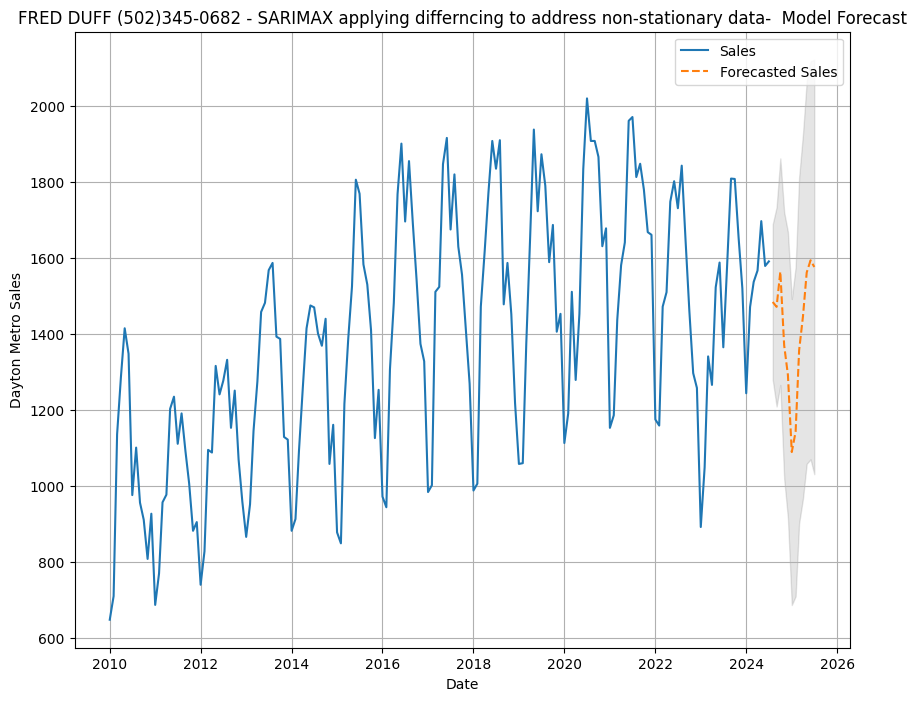

In [36]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Sales'], label='Sales')
plt.plot(forecast_SARIMA_data.index, forecast_SARIMA_data['mean'], label='Forecasted Sales', linestyle='--')
plt.fill_between(forecast_SARIMA_data.index, forecast_SARIMA_data['mean_ci_lower'], forecast_SARIMA_data['mean_ci_upper'], color='k', alpha=0.10)
plt.title('FRED DUFF (502)345-0682 - SARIMAX applying differncing to address non-stationary data-  Model Forecast')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Define the target variable and features
features = ['Active', 'CPI', '30yrFRM', 'Inflation_Rate', 'Unemployment']
target = 'Sales'

# Normalize the data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using the past 12 months to predict the next month
X_train, y_train = create_sequences(train[features].values, seq_length)
X_test, y_test = create_sequences(test[features].values, seq_length)

y_train = train[target].values[seq_length:]
y_test = test[target].values[seq_length:]


In [38]:
# Build the DNN model
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(seq_length, len(features))),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mean_squared_error')
dnn_model.summary()

# Train the DNN model
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12, 32)              │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,849 (11.13 KB)

 Trainable params: 2,849 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.3108 - val_loss: 0.0657
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1773 - val_loss: 0.0327
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1250 - val_loss: 0.0642
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0933 - val_loss: 0.1578
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0846 - val_loss: 0.2658
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0781 - val_loss: 0.3501
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0670 - val_loss: 0.3883
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0576 - val_loss: 0.4376
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0537 - val_loss: 0.5269
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0426 - val_loss: 0.6315
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0369 - val_loss: 0.7295
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0405 - val_loss: 0.8367
E

In [39]:
# Build the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, len(features))),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.summary()

# Train the CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 4, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.3593 - val_loss: 0.2814
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2365 - val_loss: 0.1145
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1460 - val_loss: 0.0235
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0850 - val_loss: 0.0633
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0719 - val_loss: 0.1817
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0906 - val_loss: 0.2365
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0693 - val_loss: 0.2286
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0530 - val_loss: 0.2446
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0487 - val_loss: 0.3104
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0434 - val_loss: 0.4341
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0440 - val_loss: 0.5347
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - val_loss: 0.6382
E

In [40]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.3506 - val_loss: 0.1521
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1584 - val_loss: 0.0287
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0842 - val_loss: 0.1185
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0888 - val_loss: 0.1103
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0589 - val_loss: 0.0876
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0558 - val_loss: 0.1086
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0547 - val_loss: 0.2169
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0482 - val_loss: 0.4264
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0432 - val_loss: 0.5355
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0450 - val_loss: 0.5054
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0403 - val_loss: 0.5281
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0389 - val_loss: 0.5744


In [41]:
# Build the CNN-LSTM hybrid model
cnn_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, len(features))),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_lstm_model.summary()

# Train the CNN-LSTM hybrid model
history_cnn_lstm = cnn_lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 11, 64)              │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,177 (180.38 KB)

 Trainable params: 46,177 (180.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.3485 - val_loss: 0.1578
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2280 - val_loss: 0.0337
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1115 - val_loss: 0.1038
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0878 - val_loss: 0.3006
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0845 - val_loss: 0.2596
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0625 - val_loss: 0.1787
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0590 - val_loss: 0.1641
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0552 - val_loss: 0.2388
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0498 - val_loss: 0.3778
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0481 - val_loss: 0.4947
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0440 - val_loss: 0.4579
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0437 - val_loss: 0.3925


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1805
DNN Model MSE: 0.3689114451408386
CNN Model MSE: 0.356846421957016
LSTM Model MSE: 0.070722296833992
CNN-LSTM Model MSE: 0.1804528385400772


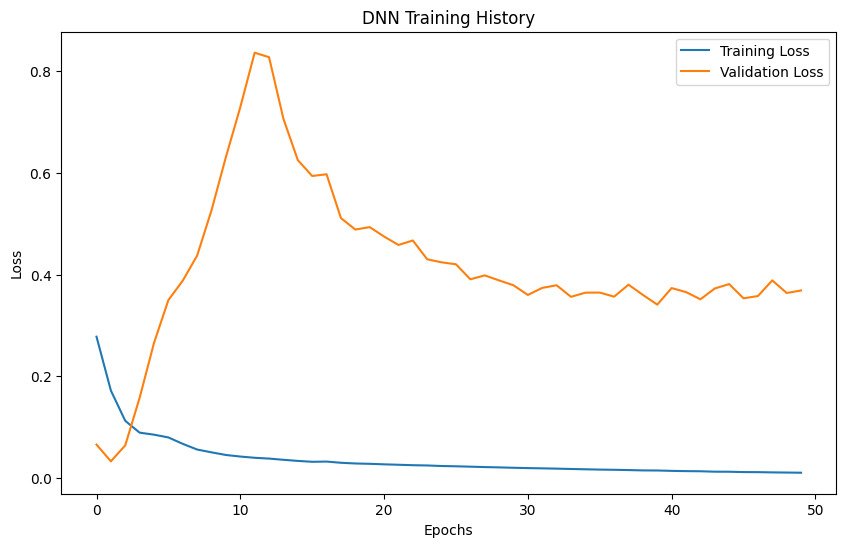

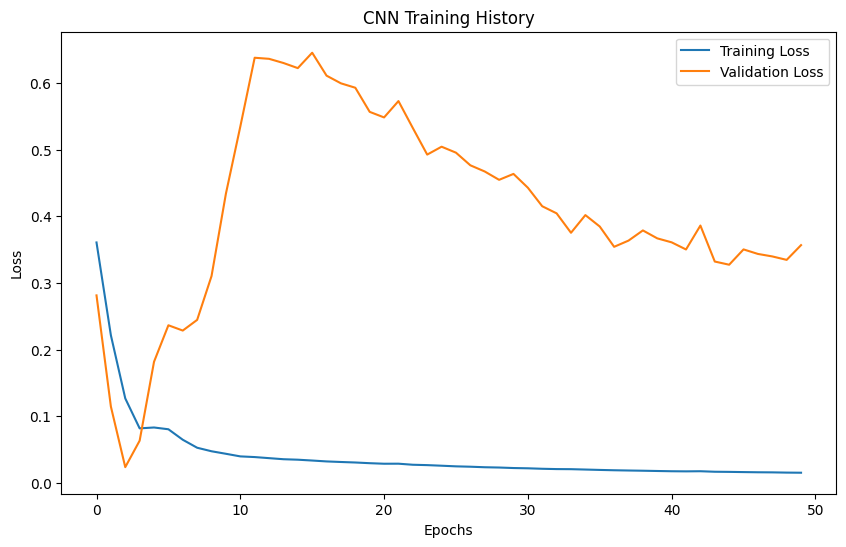

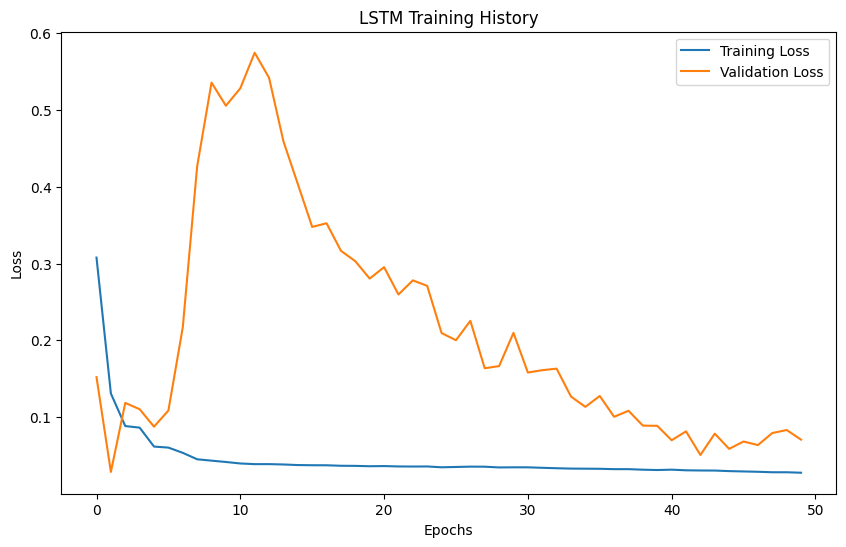

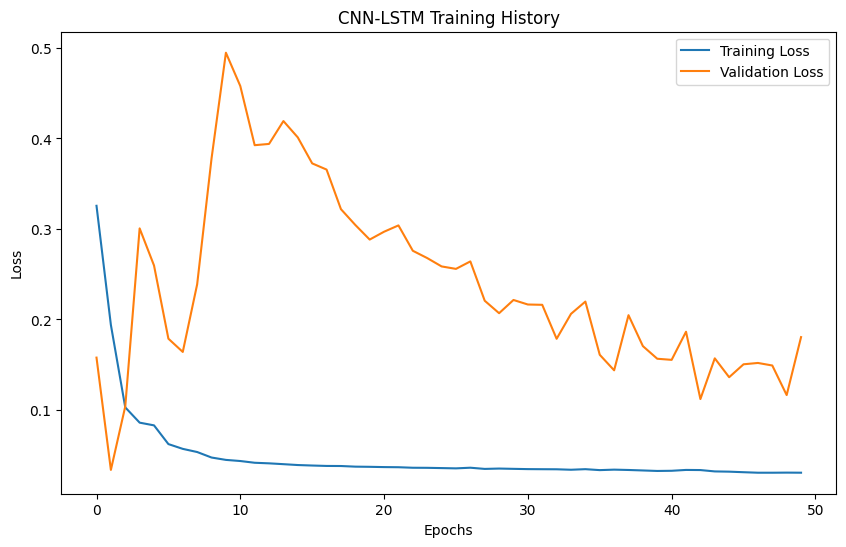

In [42]:
# Evaluate the models
dnn_mse = dnn_model.evaluate(X_test, y_test)
cnn_mse = cnn_model.evaluate(X_test, y_test)
lstm_mse = lstm_model.evaluate(X_test, y_test)
cnn_lstm_mse = cnn_lstm_model.evaluate(X_test, y_test)

print(f"DNN Model MSE: {dnn_mse}")
print(f"CNN Model MSE: {cnn_mse}")
print(f"LSTM Model MSE: {lstm_mse}")
print(f"CNN-LSTM Model MSE: {cnn_lstm_mse}")

# Plot the training history
def plot_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_dnn, 'DNN Training History')
plot_history(history_cnn, 'CNN Training History')
plot_history(history_lstm, 'LSTM Training History')
plot_history(history_cnn_lstm, 'CNN-LSTM Training History')


In [43]:
# Hyperparameter Tuning for DNN
class DNNHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Flatten(input_shape=(seq_length, len(features))))
        
        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 32, 256, step=32),
                                            activation='relu'))
        
        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss='mean_squared_error')
        return model

dnn_hypermodel = DNNHyperModel()

tuner_dnn = RandomSearch(
    dnn_hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='dnn_tuning',
    project_name='dnn_sales_forecasting'
)

tuner_dnn.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

best_dnn_model = tuner_dnn.get_best_models(num_models=1)[0]
best_dnn_model.summary()


Reloading Tuner from dnn_tuning\dnn_sales_forecasting\tuner0.json



C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          20,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,609 (111.75 KB)

 Trainable params: 28,609 (111.75 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Hyperparameter Tuning for CNN
class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_1', 32, 128, step=32),
                                         kernel_size=2, activation='relu',
                                         input_shape=(seq_length, len(features))))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
        
        for i in range(hp.Int('num_conv_layers', 1, 3)):
            model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_' + str(i+2), 32, 128, step=32),
                                             kernel_size=2, activation='relu'))
        
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss='mean_squared_error')
        return model

cnn_hypermodel = CNNHyperModel()

tuner_cnn = RandomSearch(
    cnn_hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='cnn_tuning',
    project_name='cnn_sales_forecasting'
)

tuner_cnn.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

best_cnn_model = tuner_cnn.get_best_models(num_models=1)[0]
best_cnn_model.summary()


Reloading Tuner from cnn_tuning\cnn_sales_forecasting\tuner0.json


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 128)             │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 4, 32)               │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 3, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        
        # First LSTM layer
        model.add(LSTM(
            units=hp.Int('units_1', 32, 128, step=32),
            return_sequences=hp.Boolean('return_sequences_1', default=True),
            input_shape=(seq_length, len(features))
        ))
        
        # Adding additional LSTM layers based on hyperparameters
        num_lstm_layers = hp.Int('num_lstm_layers', 1, 3)
        for i in range(num_lstm_layers - 1):
            model.add(LSTM(
                units=hp.Int('units_' + str(i + 2), 32, 128, step=32),
                return_sequences=True if i < num_lstm_layers - 2 else False
            ))
        
        # Output layer
        model.add(Dense(1))
        
        # Compile the model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
            ),
            loss='mean_squared_error'
        )
        
        return model


In [46]:
# Assuming `seq_length` and `features` are already defined
lstm_hypermodel = LSTMHyperModel()

tuner_lstm = RandomSearch(
    lstm_hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_sales_forecasting'
)

# Assuming `X_train`, `y_train`, `X_test`, and `y_test` are already defined
tuner_lstm.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]
best_lstm_model.summary()


Reloading Tuner from lstm_tuning\lstm_sales_forecasting\tuner0.json


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 96)              │          39,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,449 (314.25 KB)

 Trainable params: 80,449 (314.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Hyperparameter Tuning for CNN-LSTM Hybrid
class CNNLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters_1', 32, 128, step=32),
                                         kernel_size=2, activation='relu',
                                         input_shape=(seq_length, len(features))))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
        
        model.add(tf.keras.layers.LSTM(units=hp.Int('units_1', 32, 128, step=32), return_sequences=True))
        model.add(tf.keras.layers.LSTM(units=hp.Int('units_2', 32, 128, step=32)))
        
        model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss='mean_squared_error')
        return model

cnn_lstm_hypermodel = CNNLSTMHyperModel()

tuner_cnn_lstm = RandomSearch(
    cnn_lstm_hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='cnn_lstm_tuning',
    project_name='cnn_lstm_sales_forecasting'
)

tuner_cnn_lstm.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

best_cnn_lstm_model = tuner_cnn_lstm.get_best_models(num_models=1)[0]
best_cnn_lstm_model.summary()


Reloading Tuner from cnn_lstm_tuning\cnn_lstm_sales_forecasting\tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 32)              │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 5, 64)               │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 96)                  │          61,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,105 (340.25 KB)

 Trainable params: 87,105 (340.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Create a dictionary to store the MSE values with corresponding model names
mse_values = {
    "DNN": dnn_mse,
    "CNN": cnn_mse,
    "LSTM": lstm_mse,
    "CNN-LSTM": cnn_lstm_mse
}

# Find the model with the lowest MSE
best_model_name = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model_name]

# Select the corresponding model object
if best_model_name == "DNN":
    best_model = best_dnn_model
elif best_model_name == "CNN":
    best_model = best_cnn_model
elif best_model_name == "LSTM":
    best_model = best_lstm_model
elif best_model_name == "CNN-LSTM":
    best_model = best_cnn_lstm_model

print(f"The best model is: {best_model_name} with an MSE of {best_mse}")

The best model is: LSTM with an MSE of 0.070722296833992


In [49]:
best_model = best_cnn_lstm_model

In [50]:
def forecast_with_model(model, X, n_forecasts):
    forecast = []
    current_batch = X[-1].reshape((1, seq_length, len(features)))
    
    for _ in range(n_forecasts):
        current_pred = model.predict(current_batch)[0]
        forecast.append(current_pred)
        current_pred_reshaped = np.zeros((1, 1, len(features)))
        current_pred_reshaped[0, 0, 0] = current_pred
        current_batch = np.append(current_batch[:, 1:, :], current_pred_reshaped, axis=1)
    
    return np.array(forecast).flatten()

In [51]:
# Forecast future values
n_forecasts = 12  # For 12 future steps (12 months)
future_forecasts_scaled = forecast_with_model(best_model, X_test, n_forecasts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


C:\conda_tmp\ipykernel_22096\991381963.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_pred_reshaped[0, 0, 0] = current_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [52]:
# Create a DataFrame for the scaled forecasts
future_forecast_scaled_df = pd.DataFrame(future_forecasts_scaled, columns=['Forecast'])

In [53]:
# Create a DataFrame with the same structure as the original scaled data
dummy_data = pd.DataFrame(columns=data_scaled.columns)

In [54]:
# Assign the scaled forecast values to the 'Sales' column
dummy_data['Sales'] = future_forecast_scaled_df['Forecast']

In [55]:
# Fill other columns with zero since they are not being transformed
for col in dummy_data.columns:
    if col != 'Sales':
        dummy_data[col] = 0


In [56]:
# Inverse transform using the scaler
inverse_transformed = scaler.inverse_transform(dummy_data)

In [57]:
# Extract the 'Sales' column from the inverse transformed data
future_forecast_df = pd.DataFrame(inverse_transformed, index=future_forecast_scaled_df.index, columns=data_scaled.columns)
future_forecast_df = future_forecast_df[['Sales']]

In [58]:
print(future_forecast_df)

          Sales
0   1519.051631
1   1519.827782
2   1517.060838
3   1505.128999
4   1496.904138
5   1472.323599
6   1456.756502
7   1426.310711
8   1405.367557
9   1367.164101
10  1338.581939
11  1291.782148


In [59]:
# Make sure future_forecast_df has the correct index
future_forecast_df.index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=len(future_forecast_df), freq='MS')

# Combine the original sales data with the forecasted sales data
combined_df = pd.concat([data[['Sales']], future_forecast_df])

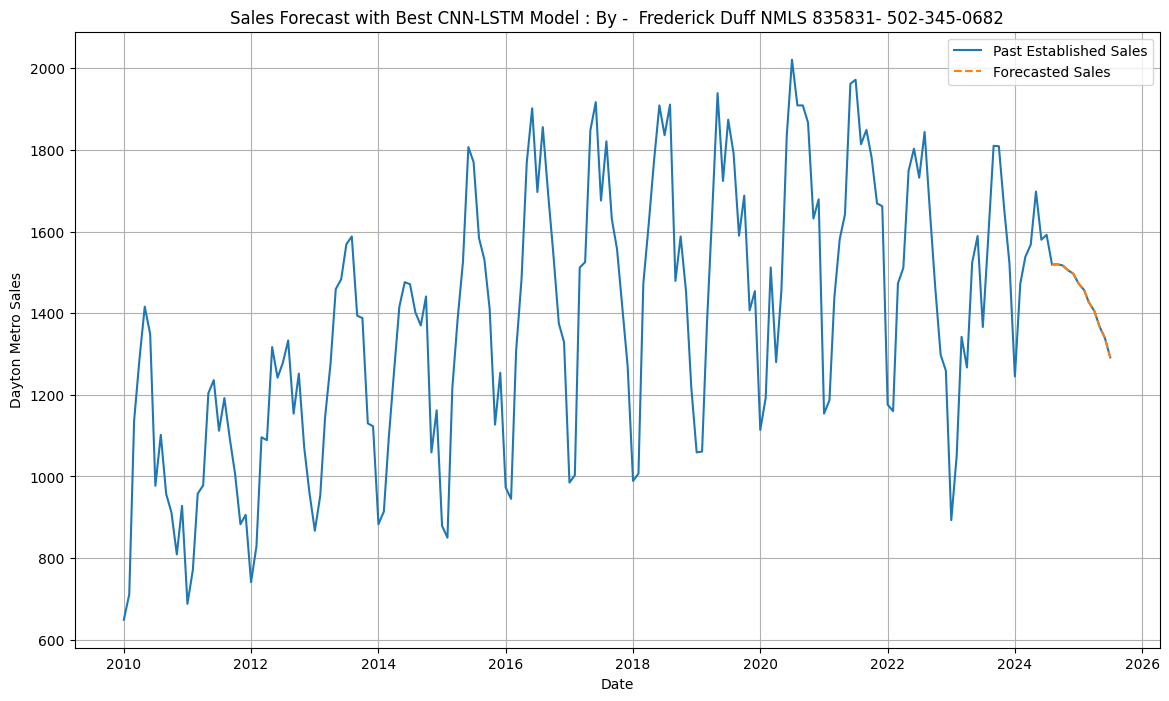

In [60]:
# Plot the original and forecasted sales
plt.figure(figsize=(14, 8))
plt.plot(combined_df.index, combined_df['Sales'], label='Past Established Sales')
plt.plot(future_forecast_df.index, future_forecast_df['Sales'], label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast with Best CNN-LSTM Model : By -  Frederick Duff NMLS 835831- 502-345-0682')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import matplotlib.image as mpimg
background_image = mpimg.imread('Dayton.jpg')

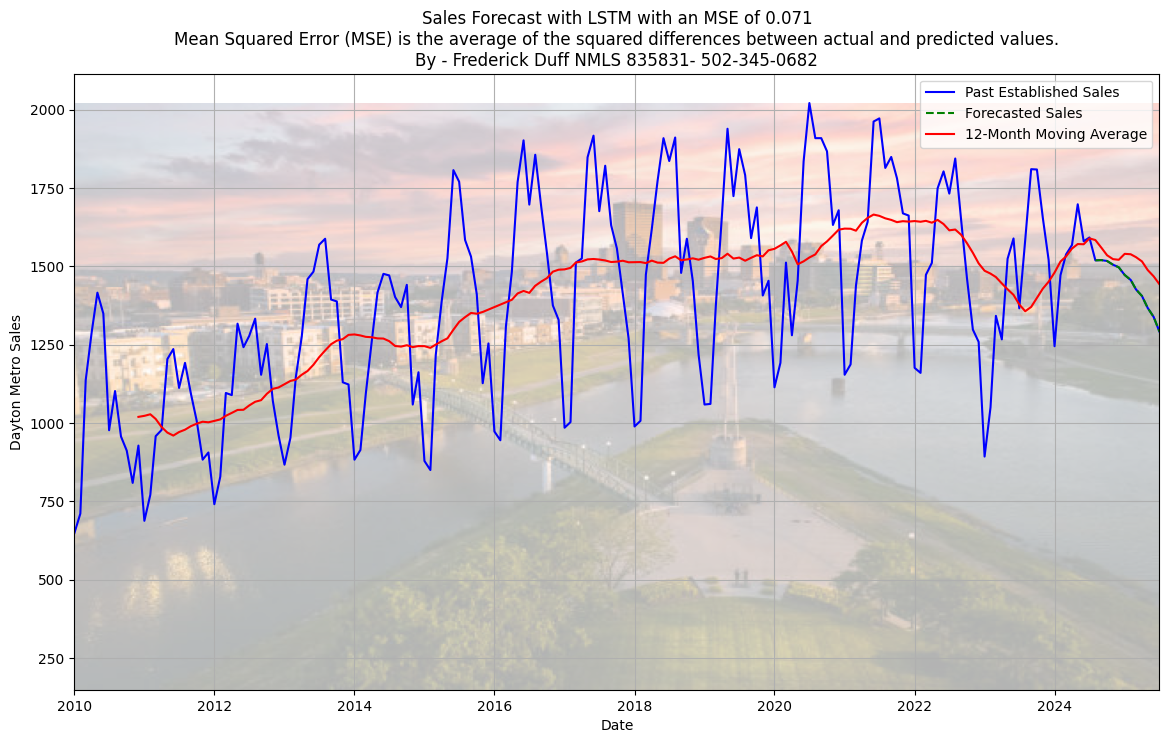

In [62]:
# Plot the original and forecasted sales with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate moving average (e.g., 12-month moving average)
combined_df['Moving_Avg'] = combined_df['Sales'].rolling(window=12).mean()

# Display the background image with transparency, moved up a bit
image_extent = [combined_df.index.min(), future_forecast_df.index.max(), combined_df['Sales'].min() - 500, future_forecast_df['Sales'].max() + 500]
ax.imshow(background_image, extent=image_extent, aspect='auto', alpha=0.3)

# Plot the data on top of the image
ax.plot(combined_df.index, combined_df['Sales'], label='Past Established Sales', color = 'blue')
ax.plot(future_forecast_df.index, future_forecast_df['Sales'], label='Forecasted Sales', linestyle='--',color = 'green')

# Plot the moving average
ax.plot(combined_df.index, combined_df['Moving_Avg'], label='12-Month Moving Average', color='red')

# Customize the plot
ax.set_title(f"Sales Forecast with {best_model_name} with an MSE of {best_mse:.3f}\n"
          "Mean Squared Error (MSE) is the average of the squared differences between actual and predicted values.\n"
          "By - Frederick Duff NMLS 835831- 502-345-0682")
ax.set_xlabel('Date')
ax.set_ylabel('Dayton Metro Sales')
ax.legend()
ax.grid(True)

plt.show()

In [63]:
future_forecast_df['Sales'].head(12)

2024-08-01    1519.051631
2024-09-01    1519.827782
2024-10-01    1517.060838
2024-11-01    1505.128999
2024-12-01    1496.904138
2025-01-01    1472.323599
2025-02-01    1456.756502
2025-03-01    1426.310711
2025-04-01    1405.367557
2025-05-01    1367.164101
2025-06-01    1338.581939
2025-07-01    1291.782148
Freq: MS, Name: Sales, dtype: float64

In [64]:
data['Sales'].tail(12)

Month
2023-08-01    1584.0
2023-09-01    1810.0
2023-10-01    1809.0
2023-11-01    1654.0
2023-12-01    1521.0
2024-01-01    1245.0
2024-02-01    1472.0
2024-03-01    1538.0
2024-04-01    1568.0
2024-05-01    1698.0
2024-06-01    1580.0
2024-07-01    1592.0
Name: Sales, dtype: float64

### ACTIVE LISTINGS USING META's Open source PROPHET MODEL

In [65]:
from prophet import Prophet

In [66]:
# Initialize the model
model = Prophet()

In [67]:
# Display the dataframe to verify columns
print(df.head())

             Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01   9771.0   649.0  216.687        1922.0    63910551.0   
2010-02-01   9992.0   711.0  216.741        1879.0    72016005.0   
2010-03-01  10592.0  1137.0  217.631        2797.0   124253682.0   
2010-04-01  10924.0  1289.0  218.009        2738.0   142969152.0   
2010-05-01  11154.0  1416.0  218.178        2073.0   167390513.0   

            Expired_Listings  
Month                         
2010-01-01            1694.0  
2010-02-01            1545.0  
2010-03-01            1791.0  
2010-04-01            1748.0  
2010-05-01            1669.0  


In [68]:
# Reset the index to turn 'Month' into a column
df.reset_index(inplace=True)

In [69]:
# Convert 'Month' column to datetime with the specified format
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')

# Rename columns to fit Prophet's requirements
df.rename(columns={'Month': 'ds'}, inplace=True)

# Convert 'ds' column to the desired format
df['ds'] = df['ds'].dt.strftime('%d-%m-%Y %H:%M')

# Convert 'ds' column back to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y %H:%M')

In [70]:
# rename Active Column to y to fit prophet's requirements
df.rename(columns={'Active': 'y'}, inplace=True)

In [71]:
df.head()

,ds,y,Sales,CPI,New_Listings,Sales_Volume,Expired_Listings
0,2010-01-01,9771.0,649.0,216.687,1922.0,63910551.0,1694.0
1,2010-02-01,9992.0,711.0,216.741,1879.0,72016005.0,1545.0
2,2010-03-01,10592.0,1137.0,217.631,2797.0,124253682.0,1791.0
3,2010-04-01,10924.0,1289.0,218.009,2738.0,142969152.0,1748.0
4,2010-05-01,11154.0,1416.0,218.178,2073.0,167390513.0,1669.0


In [72]:
# Fit the model to the data
model.fit(df)

22:43:09 - cmdstanpy - INFO - Chain [1] start processing
22:43:09 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
# Create a dataframe with future dates
future = model.make_future_dataframe(periods=12, freq='M')

In [74]:
future.tail(12)

,ds
175,2024-07-31
176,2024-08-31
177,2024-09-30
178,2024-10-31
179,2024-11-30
180,2024-12-31
181,2025-01-31
182,2025-02-28
183,2025-03-31
184,2025-04-30


In [75]:
# Make predictions
forecast = model.predict(future)

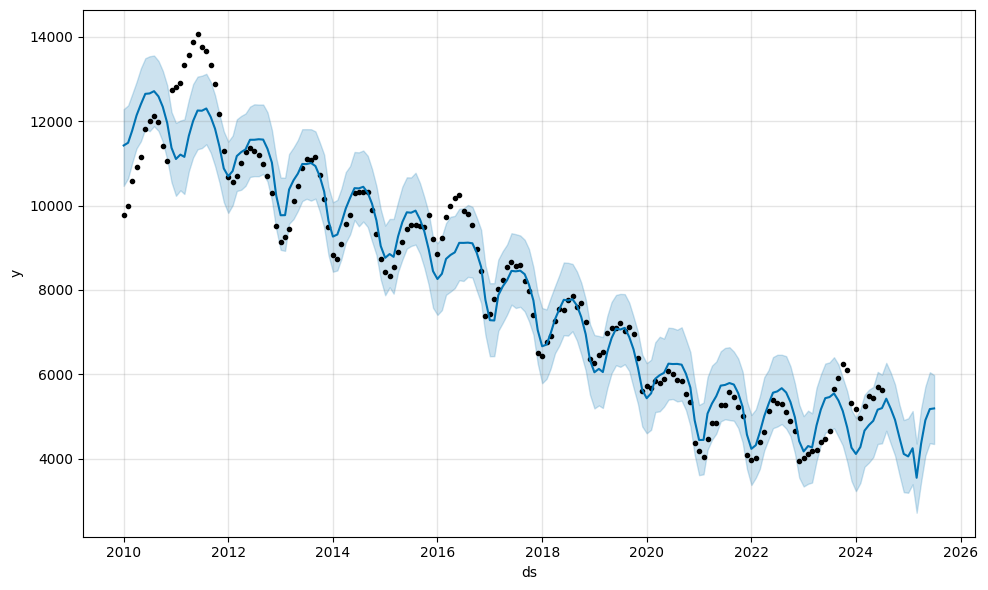

In [76]:
# Plot the forecast
fig = model.plot(forecast)

### ACTIVE LISTING SARIMA FORECAST

In [77]:
# Define the endogenous and exogenous variables
endog = data['Active']
exog = data[['Sales', 'CPI', '30yrFRM', 'Inflation_Rate', 'Unemployment']]

In [78]:
# Use auto_arima to find the best SARIMAX parameters
auto_arima_model = pm.auto_arima(endog, exogenous=exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2568.433, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2473.724, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2488.291, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2567.098, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2528.279, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2474.895, Time=0.39 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2472.393, Time=0.39 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2484.481, Time=0.16 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2472.197, Time=0.92 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2483.705, Time=0.45 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2489.421, Time=0.77 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept

In [79]:
# Fit SARIMAX model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                  Active   No. Observations:                  175
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1219.207
Date:                                 Wed, 14 Aug 2024   AIC                           2458.415
Time:                                         22:43:34   BIC                           2490.005
Sample:                                     01-01-2010   HQIC                          2471.230
                                          - 07-01-2024                                         
Covariance Type:                                   opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Sales              0.4215      0.211      2.002      0.045       0

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
# Forecast future values
forecast_steps = 12
exog_forecast = exog[-forecast_steps:]
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_Active_data = forecast.summary_frame()
forecast_Active_data.index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

In [81]:
# Print forecasted values
print("Forecasted Values:\n", forecast_Active_data)

Forecasted Values:
 Active             mean      mean_se  mean_ci_lower  mean_ci_upper
2024-08-01  5611.222492   262.668684    5096.401332    6126.043652
2024-09-01  5701.773169   428.840650    4861.260939    6542.285399
2024-10-01  5750.146779   560.657812    4651.277660    6849.015898
2024-11-01  5548.956331   670.421112    4234.955097    6862.957566
2024-12-01  4889.848619   765.487556    3389.520578    6390.176660
2025-01-01  4798.461742   850.223512    3132.054281    6464.869204
2025-02-01  4835.644541   927.311044    3018.148293    6653.140790
2025-03-01  4991.097935   998.481601    3034.109958    6948.085912
2025-04-01  5172.551749  1064.910849    3085.364839    7259.738659
2025-05-01  5258.519857  1127.434075    3048.789675    7468.250038
2025-06-01  5270.773576  1186.667984    2944.947066    7596.600085
2025-07-01  5298.836438  1243.082643    2862.439229    7735.233647


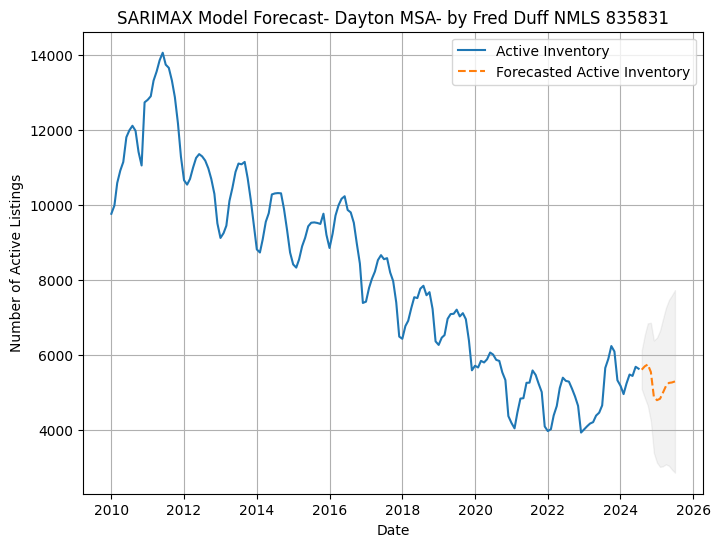

In [82]:
# Plot the forecast
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['Active'], label='Active Inventory')
plt.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--')
plt.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.05)
plt.title('SARIMAX Model Forecast- Dayton MSA- by Fred Duff NMLS 835831')
plt.xlabel('Date')
plt.ylabel('Number of Active Listings')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
data['Moving_Avg'] = data['Active'].rolling(window=12).mean()


In [84]:
# import the image for the plot
background_image2 = mpimg.imread('Dayton.jpg')

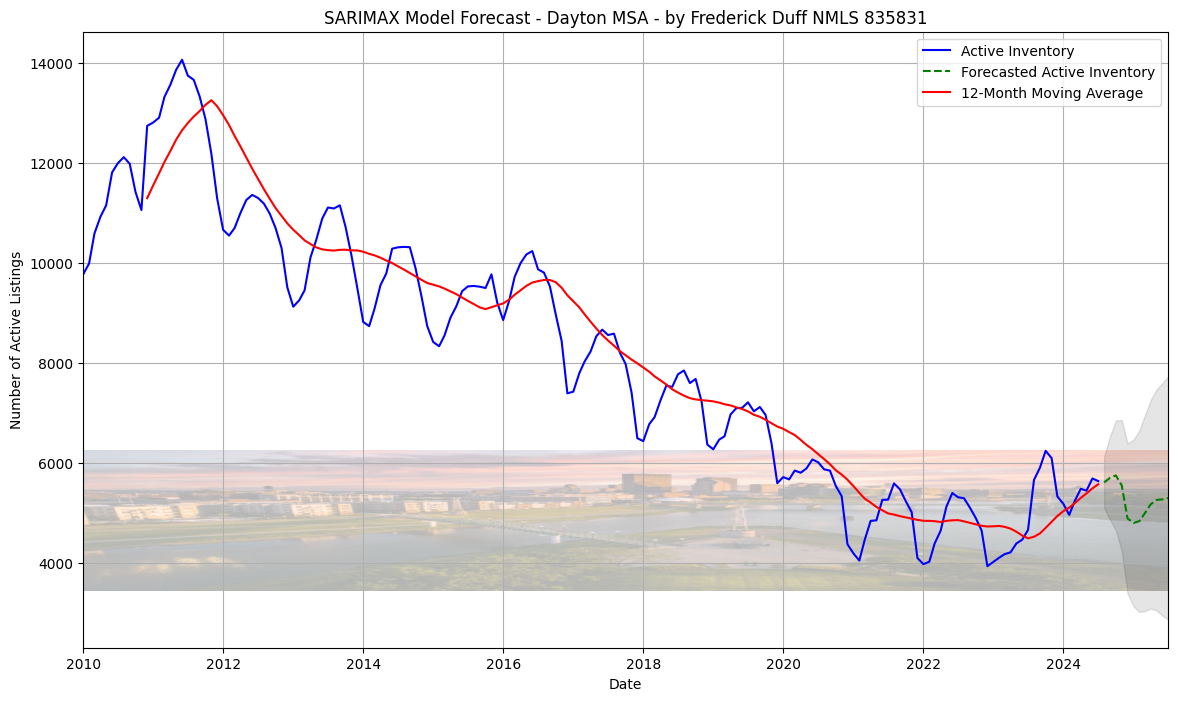

In [85]:
# Plot the original and forecasted Active Inventory with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Display the background image with transparency, moved up a bit
image_extent = [data.index.min(), forecast_Active_data.index.max(), data['Active'].min() - 500, forecast_Active_data['mean'].max() + 500]
ax.imshow(background_image2, aspect='auto',extent=image_extent, alpha=0.3)

# Plot the data on top of the image
ax.plot(data.index, data['Active'], label='Active Inventory', color='blue')
ax.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--', color='green')

# Plot the moving average
ax.plot(data.index, data['Moving_Avg'], label='12-Month Moving Average', color='red')


# Plot the confidence intervals
ax.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.1)

# Customize the plot
ax.set_title('SARIMAX Model Forecast - Dayton MSA - by Frederick Duff NMLS 835831')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Active Listings')
ax.legend()
ax.grid(True)


plt.show()


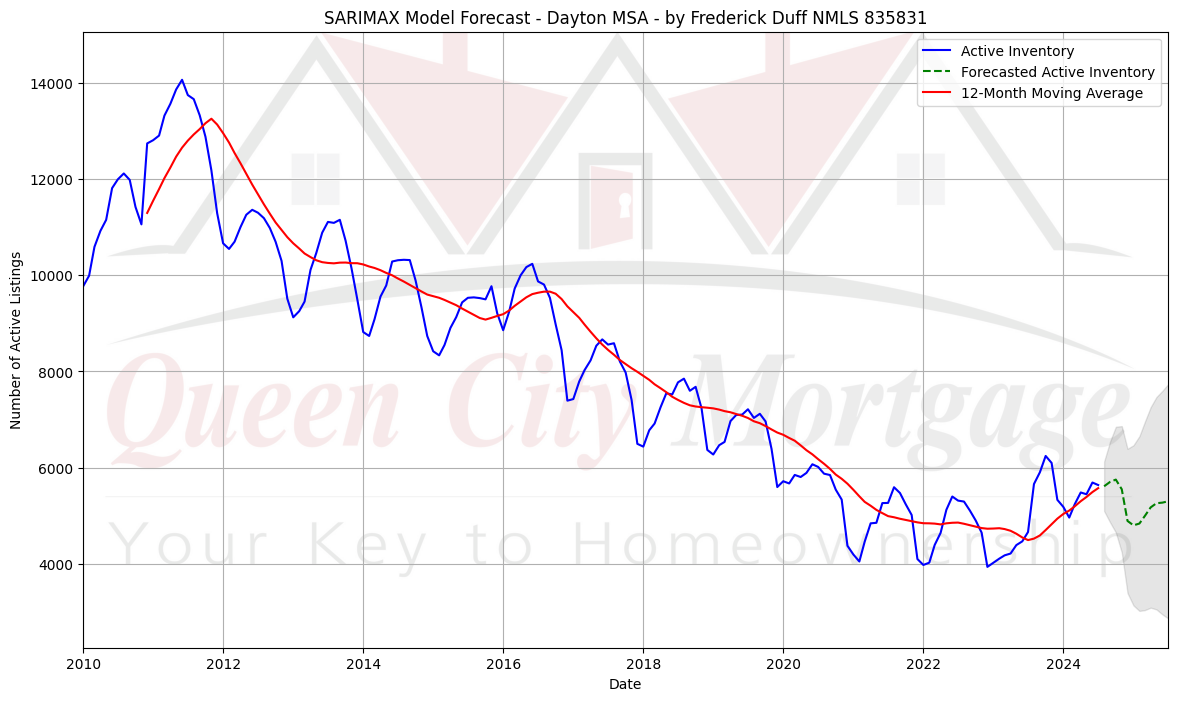

In [86]:
# Calculate a moving average (e.g., 12-month moving average) for Active Inventory
data['Moving_Avg'] = data['Active'].rolling(window=12).mean()

# Load the background image
background_image2 = mpimg.imread('qcm_logo.jpg')

# Plot the original and forecasted Active Inventory with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Adjust the extent to better fit the image
y_min = data['Active'].min() - 500
y_max = data['Active'].max() + 1000  # Adjust as needed
x_min = data.index.min()
x_max = forecast_Active_data.index.max()

# Display the background image with transparency, moved up a bit
image_extent = [x_min, x_max, y_min, y_max]
ax.imshow(background_image2, extent=image_extent, aspect='auto', alpha=0.1)

# Plot the data on top of the image
ax.plot(data.index, data['Active'], label='Active Inventory', color='blue')
ax.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--', color='green')

# Plot the moving average
ax.plot(data.index, data['Moving_Avg'], label='12-Month Moving Average', color='red')

# Plot the confidence intervals
ax.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.1)

# Customize the plot
ax.set_title('SARIMAX Model Forecast - Dayton MSA - by Frederick Duff NMLS 835831')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Active Listings')
ax.legend()
ax.grid(True)

plt.show()


## DISPARITY BETWEEN ACTIVE LISTINGS AND SALES

In [87]:
# Calculate the disparity between active listings and sales
data['Disparity'] = data['Active'] - data['Sales']


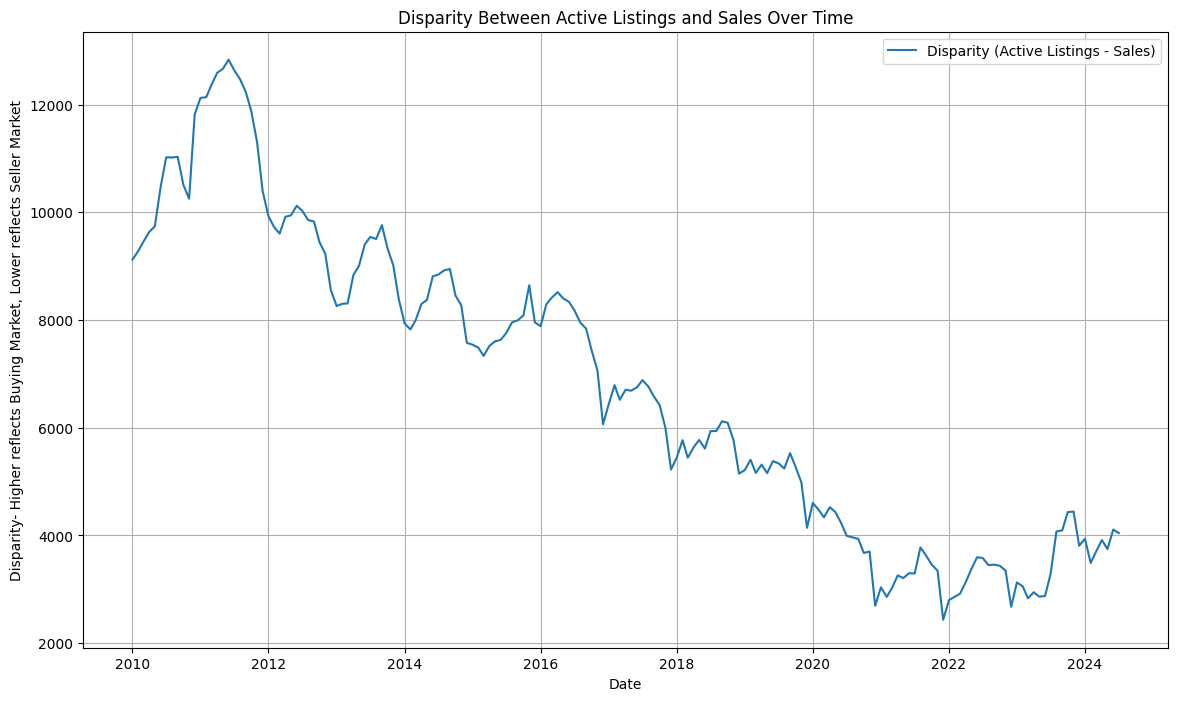

In [88]:
# Plot the disparity between active listings and sales
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Disparity'], label='Disparity (Active Listings - Sales)')
plt.title('Disparity Between Active Listings and Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Disparity- Higher reflects Buying Market, Lower reflects Seller Market')
plt.legend()
plt.grid(True)
plt.show()


            Active   Sales  Disparity%
Month                                 
2023-08-01  5658.0  1584.0   72.004242
2023-09-01  5903.0  1810.0   69.337625
2023-10-01  6242.0  1809.0   71.018904
2023-11-01  6097.0  1654.0   72.871904
2023-12-01  5329.0  1521.0   71.458060
2024-01-01  5183.0  1245.0   75.979163
2024-02-01  4960.0  1472.0   70.322581
2024-03-01  5240.0  1538.0   70.648855
2024-04-01  5482.0  1568.0   71.397300
2024-05-01  5445.0  1698.0   68.815427
2024-06-01  5689.0  1580.0   72.227105
2024-07-01  5637.0  1592.0   71.758027


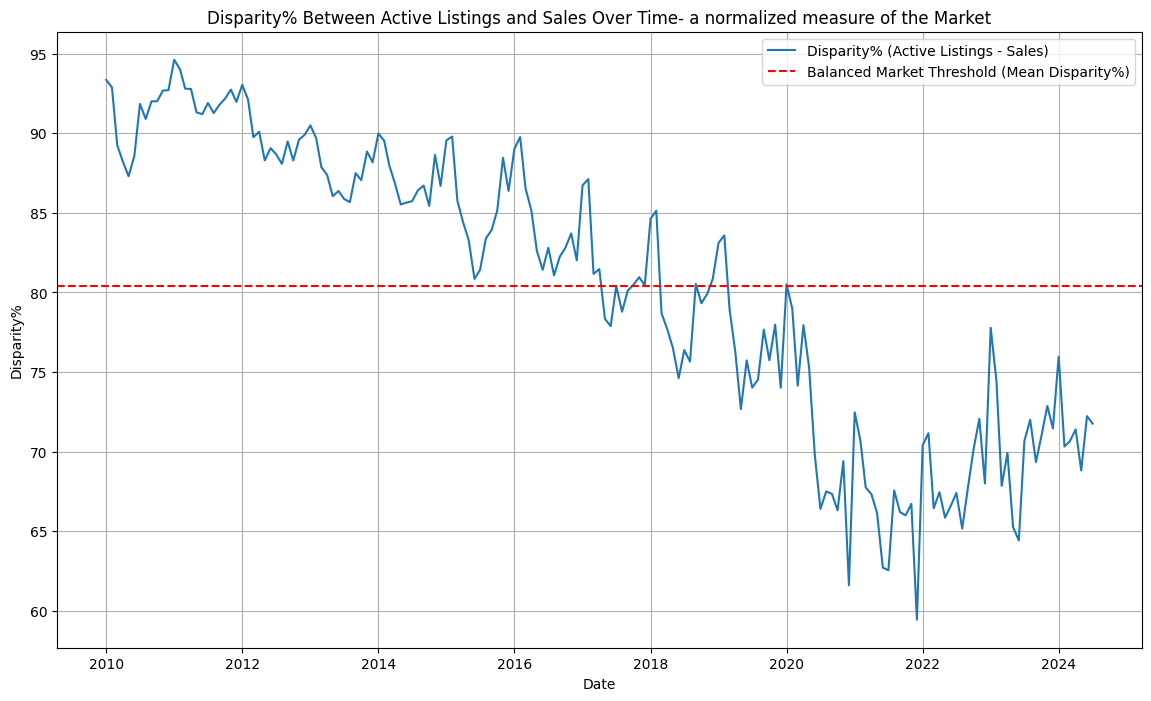

Statistical Summary of Disparity as a percentage since Jan 2010 


count    175.000000
mean      80.401899
std        9.028152
min       59.433732
25%       72.144547
50%       81.430969
75%       88.248038
max       94.629615
Name: Disparity%, dtype: float64

In [89]:
# Calculate Disparity%
data['Disparity%'] = ((data['Active'] - data['Sales']) / data['Active']) * 100

# Calculate the mean of Disparity%
mean_disparity = data['Disparity%'].mean()

# Print the first few rows to verify
print(data[['Active', 'Sales', 'Disparity%']].tail(12))

# Plot the Disparity%
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Disparity%'], label='Disparity% (Active Listings - Sales)')
plt.axhline(mean_disparity, color='red', linestyle='--', label='Balanced Market Threshold (Mean Disparity%)')
plt.title('Disparity% Between Active Listings and Sales Over Time- a normalized measure of the Market')
plt.xlabel('Date')
plt.ylabel('Disparity%')
plt.legend()
plt.grid(True)
plt.show()
print('Statistical Summary of Disparity as a percentage since Jan 2010 ')
data['Disparity%'].describe()

In [90]:
data.tail(8)

,Active,Sales,CPI,30yrFRM,Inflation_Rate,Unemployment,Moving_Avg,Disparity,Disparity%
Month,,,,,,,,,
2023-12-01,5329.0,1521.0,306.746,6.8150,4.1,3.1,4937.583333,3808.0,71.458060
2024-01-01,5183.0,1245.0,308.417,6.6425,3.2,4.0,5034.500000,3938.0,75.979163
2024-02-01,4960.0,1472.0,310.326,6.7760,3.5,4.3,5105.750000,3488.0,70.322581
2024-03-01,5240.0,1538.0,312.332,6.8200,3.4,4.4,5194.583333,3702.0,70.648855
2024-04-01,5482.0,1568.0,313.548,6.9925,3.4,4.5,5300.416667,3914.0,71.397300
2024-05-01,5445.0,1698.0,314.069,7.0600,4.4,4.5,5388.583333,3747.0,68.815427
2024-06-01,5689.0,1580.0,314.175,6.9175,3.0,4.1,5490.583333,4109.0,72.227105
2024-07-01,5637.0,1592.0,314.803,6.8475,2.9,4.3,5572.083333,4045.0,71.758027


- The disparity between active listings and sales in a real estate market can provide several insights into market dynamics and   conditions:
* 1.	Market Balance:
   o	Seller's Market: If active listings are low relative to sales, it indicates high demand and low supply, leading to a           seller's market. In such a market, homes sell quickly, often at or above the asking price.
   o	Buyer's Market: If active listings are high relative to sales, it indicates high supply and low demand, leading to a           buyer's market. In such a market, buyers have more choices and can negotiate lower prices.
* 2.	    Market Liquidity:
   o	A low disparity (i.e., active listings close to sales) suggests a liquid market where properties are moving quickly.
   o	A high disparity indicates less liquidity, meaning properties stay on the market longer.
* 3.	Price Trends:
   o	A high number of active listings with stagnant or declining sales can lead to downward pressure on prices as sellers           compete to attract buyers.
   o	Conversely, low inventory with high sales can drive prices up due to competition among buyers.
* 4.	Economic Indicators:
   o	The disparity can reflect broader economic conditions. For example, economic downturns might see a rise in active               listings (as more people need to sell) but a drop in sales (as fewer people can afford to buy).
   o	Economic growth periods might see the opposite, with fewer active listings and higher sales.
* 5.	Market Sentiment:
   o	A growing disparity where listings outpace sales could indicate increasing seller pessimism or decreasing buyer                 confidence.
   o	A shrinking disparity could signal growing confidence among buyers or fewer sellers willing to list their properties,           expecting higher future prices.


In [91]:
data['Disparity'].describe()

count      175.000000
mean      6766.177143
std       2814.233032
min       2435.000000
25%       4059.500000
50%       6705.000000
75%       8882.000000
max      12832.000000
Name: Disparity, dtype: float64

In [92]:
data['Disparity%'].describe()

count    175.000000
mean      80.401899
std        9.028152
min       59.433732
25%       72.144547
50%       81.430969
75%       88.248038
max       94.629615
Name: Disparity%, dtype: float64

## Year over Year Estimated Difference in Sales by Models

In [93]:
# Year over Year forecasted difference in sales 

In [94]:
# Ensure the last 12 months of data['Sales'] and first 12 months of forecast_SARIMA_data['mean'] align properly
past_sales = data['Sales'].tail(12).reset_index(drop=True)
future_sales3 = forecast_SARIMA_data['mean'].head(12).reset_index(drop=True)

# Calculate the difference
SARIMAdeltasales = future_sales3 - past_sales

# Create a DataFrame to display the differences with corresponding dates
SARIMAdeltasales_df = pd.DataFrame({
    'Date': forecastVAR_data.index[:12],
    'SARIMASales': SARIMAdeltasales
})

In [95]:
# Ensure the last 12 months of data['Sales'] and first 12 months of forecastVAR_data['Sales'] align properly
past_sales = data['Sales'].tail(12).reset_index(drop=True)
future_sales2 = forecastVAR_data['Sales'].head(12).reset_index(drop=True)

# Calculate the difference
VARdeltasales = future_sales2 - past_sales

# Create a DataFrame to display the differences with corresponding dates
VARdeltasales_df = pd.DataFrame({
    'Date': forecastVAR_data.index[:12],
    'VARSales': VARdeltasales
})

In [96]:
# Ensure the last 12 months of data['Sales'] and first 12 months of future_forecast_df['Sales'] align properly
past_sales = data['Sales'].tail(12).reset_index(drop=True)
future_sales = future_forecast_df['Sales'].head(12).reset_index(drop=True)

# Calculate the difference
cnndeltasales = future_sales - past_sales

# Create a DataFrame to display the differences with corresponding dates
cnndeltasales_df = pd.DataFrame({
    'Date': future_forecast_df.index[:12],
    'CNNSales': cnndeltasales
})


In [97]:
cnndeltasales_df

,Date,CNNSales
0,2024-08-01,-64.948369
1,2024-09-01,-290.172218
2,2024-10-01,-291.939162
3,2024-11-01,-148.871001
4,2024-12-01,-24.095862
5,2025-01-01,227.323599
6,2025-02-01,-15.243498
7,2025-03-01,-111.689289
8,2025-04-01,-162.632443
9,2025-05-01,-330.835899


In [98]:
VARdeltasales_df

,Date,VARSales
0,2024-08-01,-11.578047
1,2024-09-01,-262.238668
2,2024-10-01,-287.465930
3,2024-11-01,-147.770004
4,2024-12-01,-17.316654
5,2025-01-01,266.601846
6,2025-02-01,53.659397
7,2025-03-01,3.518690
8,2025-04-01,-11.955090
9,2025-05-01,-130.321323


In [99]:
SARIMAdeltasales_df

,Date,SARIMASales
0,2024-08-01,-98.793079
1,2024-09-01,-337.622081
2,2024-10-01,-244.037368
3,2024-11-01,-283.124561
4,2024-12-01,-227.788598
5,2025-01-01,-154.693700
6,2025-02-01,-328.083920
7,2025-03-01,-180.229242
8,2025-04-01,-120.509572
9,2025-05-01,-135.233226


In [100]:
# Combine the dataframes based on the 'Date' column
combined_deltasales_df = pd.merge(SARIMAdeltasales_df, VARdeltasales_df, on='Date', how='inner')
combined_deltasales_df = pd.merge(combined_deltasales_df, cnndeltasales_df, on='Date', how='inner')
# Calculate the mean across the specified columns
combined_deltasales_df['MeanSalesDifference'] = combined_deltasales_df[['SARIMASales', 'VARSales', 'CNNSales']].mean(axis=1)
# Print the combined dataframe to verify
print(combined_deltasales_df)

         Date  SARIMASales    VARSales    CNNSales  MeanSalesDifference
0  2024-08-01   -98.793079  -11.578047  -64.948369           -58.439832
1  2024-09-01  -337.622081 -262.238668 -290.172218          -296.677656
2  2024-10-01  -244.037368 -287.465930 -291.939162          -274.480820
3  2024-11-01  -283.124561 -147.770004 -148.871001          -193.255189
4  2024-12-01  -227.788598  -17.316654  -24.095862           -89.733705
5  2025-01-01  -154.693700  266.601846  227.323599           113.077248
6  2025-02-01  -328.083920   53.659397  -15.243498           -96.556007
7  2025-03-01  -180.229242    3.518690 -111.689289           -96.133280
8  2025-04-01  -120.509572  -11.955090 -162.632443           -98.365702
9  2025-05-01  -135.233226 -130.321323 -330.835899          -198.796816
10 2025-06-01    14.994365   -3.768636 -241.418061           -76.730777
11 2025-07-01   -14.651804   -9.610037 -300.217852          -108.159898


In [101]:
combined_deltasales_df

,Date,SARIMASales,VARSales,CNNSales,MeanSalesDifference
0,2024-08-01,-98.793079,-11.578047,-64.948369,-58.439832
1,2024-09-01,-337.622081,-262.238668,-290.172218,-296.677656
2,2024-10-01,-244.037368,-287.465930,-291.939162,-274.480820
3,2024-11-01,-283.124561,-147.770004,-148.871001,-193.255189
4,2024-12-01,-227.788598,-17.316654,-24.095862,-89.733705
5,2025-01-01,-154.693700,266.601846,227.323599,113.077248
6,2025-02-01,-328.083920,53.659397,-15.243498,-96.556007
7,2025-03-01,-180.229242,3.518690,-111.689289,-96.133280
8,2025-04-01,-120.509572,-11.955090,-162.632443,-98.365702
9,2025-05-01,-135.233226,-130.321323,-330.835899,-198.796816


        Date  SARIMASales    VARSales    CNNSales  MeanSalesDifference
0 2024-08-01   -98.793079  -11.578047  -64.948369           -58.439832
1 2024-09-01  -337.622081 -262.238668 -290.172218          -296.677656
2 2024-10-01  -244.037368 -287.465930 -291.939162          -274.480820
3 2024-11-01  -283.124561 -147.770004 -148.871001          -193.255189
4 2024-12-01  -227.788598  -17.316654  -24.095862           -89.733705


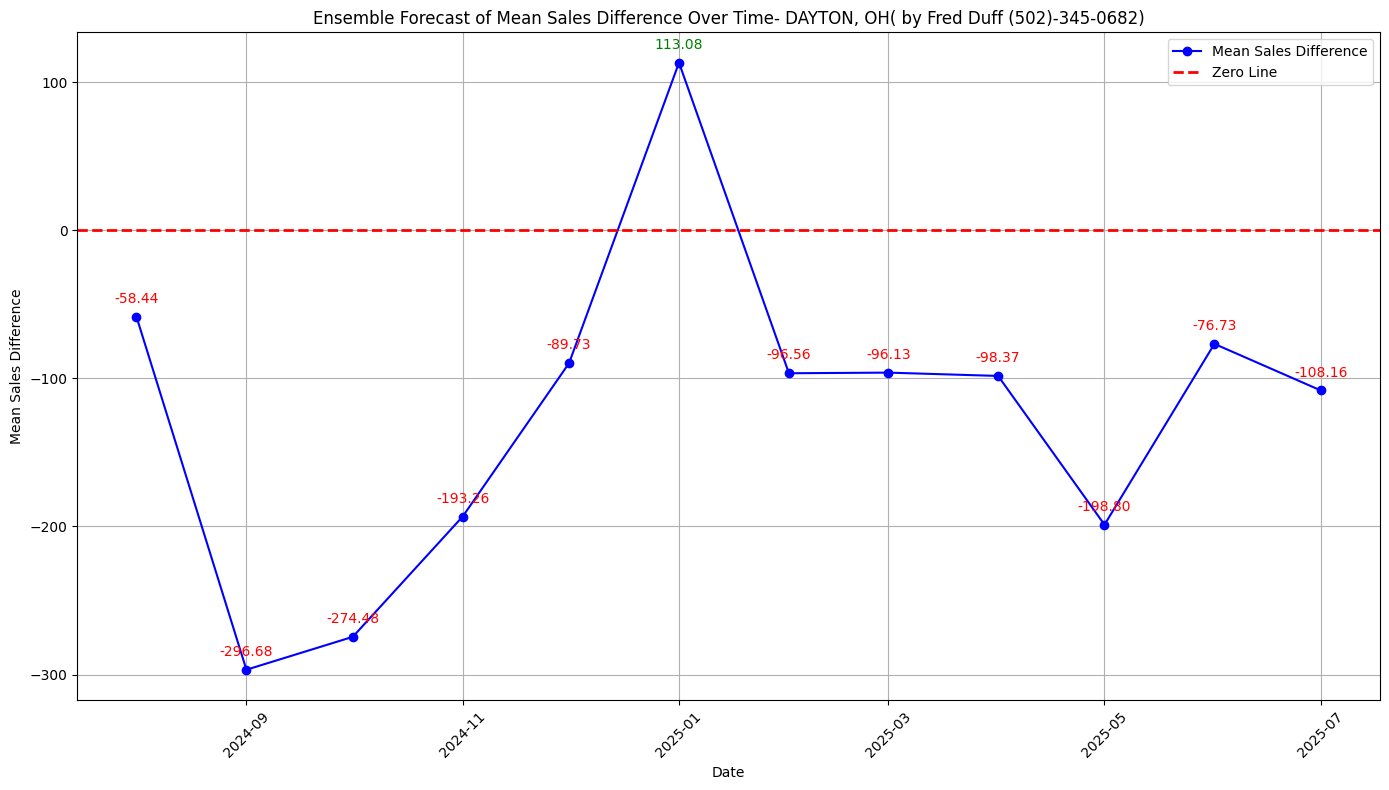

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Ensure your dataframe 'combined_deltasales_df' is correctly set up
print(combined_deltasales_df.head())  # Check the first few rows

# Plot the MeanSalesDifference
plt.figure(figsize=(14, 8))
plt.plot(combined_deltasales_df['Date'], combined_deltasales_df['MeanSalesDifference'], marker='o', linestyle='-', color='b', label='Mean Sales Difference')
# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')
# Annotate each point with its value, colored by positive/negative
for i, value in enumerate(combined_deltasales_df['MeanSalesDifference']):
    color = 'green' if value > 0 else 'red'
    plt.annotate(f'{value:.2f}', (combined_deltasales_df['Date'][i], value),
                 textcoords="offset points", xytext=(0,10), ha='center', color=color)
# Customize the plot
plt.title('Ensemble Forecast of Mean Sales Difference Over Time- DAYTON, OH( by Fred Duff (502)-345-0682)')
plt.xlabel('Date')
plt.ylabel('Mean Sales Difference')
plt.legend()
plt.grid(True)
# Set both x-axis and y-axis to have 12 labels
ax = plt.gca()
# ax.yaxis.set_major_locator(MaxNLocator(nbins=20))
# ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout
plt.show()
